In [2]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('INFO').getOrCreate()
sc = spark.sparkContext

In [3]:
df = spark.read.csv('BostonCrime2.0.csv', header = True, inferSchema = True)
df.show()

+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|2015|   10| Saturday|  13|  Part Two|   BERKELEY ST|       N|
|             6|       1102|            

In [4]:
df.printSchema()

root
 |-- INCIDENTNUMBER: integer (nullable = true)
 |-- OFFENSECODE: integer (nullable = true)
 |-- OFFENSECODEGROUP: string (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAYOFWEEK: string (nullable = true)
 |-- HOUR: integer (nullable = true)
 |-- UCRPART: string (nullable = true)
 |-- STREET: string (nullable = true)
 |-- SHOOTING: string (nullable = true)



In [5]:
df1 = pd.read_csv('BostonCrime2.0.csv')

In [6]:
print(df1.shape)

(800, 11)


In [7]:
print(df1.columns)

Index(['INCIDENTNUMBER', 'OFFENSECODE', 'OFFENSECODEGROUP', 'DISTRICT', 'YEAR',
       'MONTH', 'DAYOFWEEK', 'HOUR', 'UCRPART', 'STREET', 'SHOOTING'],
      dtype='object')


In [8]:
df1.describe()

,INCIDENTNUMBER,OFFENSECODE,YEAR,MONTH,HOUR
count,800.0000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,1949.248750,2016.503750,8.202500,15.490000
std,231.0844,1095.330431,1.120962,2.677771,6.011662
min,1.0000,301.000000,2015.000000,1.000000,1.000000
25%,200.7500,1102.000000,2015.750000,7.000000,12.000000
50%,400.5000,1402.000000,2017.000000,8.000000,14.000000
75%,600.2500,3115.000000,2018.000000,10.000000,24.000000
max,800.0000,3831.000000,2018.000000,12.000000,24.000000


In [9]:
df1.head(20)

,INCIDENTNUMBER,OFFENSECODE,OFFENSECODEGROUP,DISTRICT,YEAR,MONTH,DAYOFWEEK,HOUR,UCRPART,STREET,SHOOTING
0,1,1102,Fraud,D4,2015,12,Sunday,14,Part Two,WESTLAND AVE,N
1,2,619,Larceny,D4,2015,12,Sunday,14,Part One,WESTLAND AVE,N
2,3,1107,Fraud,E18,2015,7,Wednesday,12,Part Two,OAKCREST RD,N
3,4,1107,Fraud,C6,2015,11,Thursday,8,Part Two,E FOURTH ST,N
4,5,2647,Other,D4,2015,10,Saturday,13,Part Two,BERKELEY ST,N
5,6,1102,Fraud,D14,2015,9,Tuesday,11,Part Two,ALLSTON ST,N
6,7,3201,Property Lost,C11,2015,8,Thursday,8,Part Three,EDWIN ST,N
7,8,1102,Fraud,C11,2015,10,Wednesday,12,Part Two,WASHINGTON ST,N
8,9,1102,Fraud,C11,2015,8,Saturday,6,Part Two,DITSON ST,N
9,10,1107,Fraud,A1,2015,8,Saturday,15,Part Two,WASHINGTON ST,N


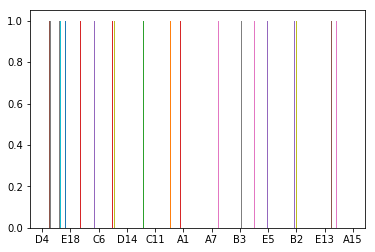

In [10]:
plt.hist(df1["DISTRICT"])
plt.show()

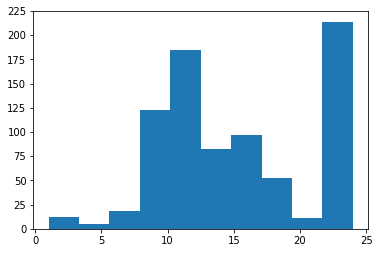

In [11]:
plt.hist(df1["HOUR"])
plt.show()

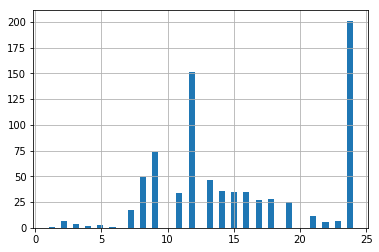

In [12]:
df1['HOUR'].hist(bins=50)

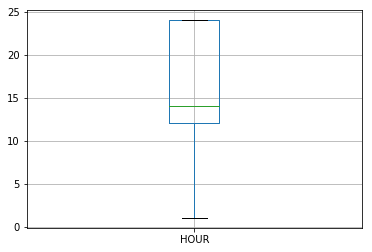

In [13]:
df1.boxplot(column='HOUR')

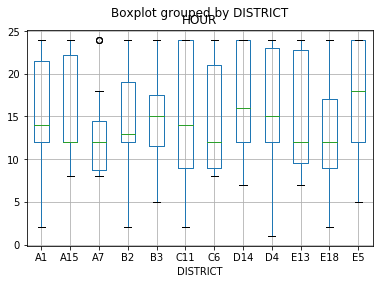

In [14]:
df1.boxplot(column='HOUR',by='DISTRICT')

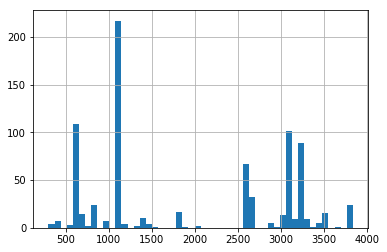

In [15]:
df1['OFFENSECODE'].hist(bins=50)

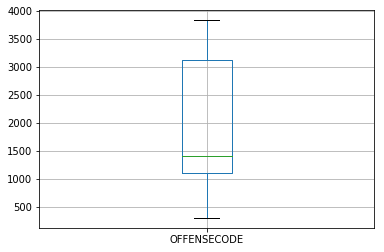

In [16]:
df1.boxplot(column='OFFENSECODE')

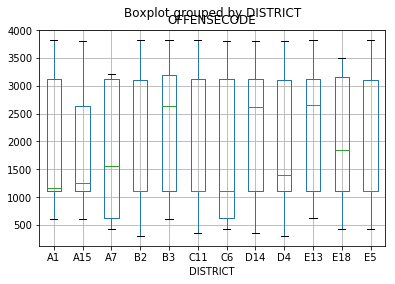

In [17]:
df1.boxplot(column='OFFENSECODE', by= 'DISTRICT')

2      15
1      17
4      17
3      20
5      23
6      56
8      56
9      80
11     86
10     89
12    109
7     232
Name: MONTH, dtype: int64


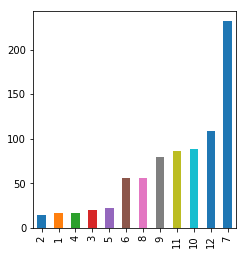

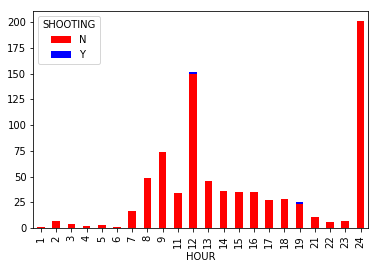

In [18]:
temp1 = df1['MONTH'].value_counts(ascending=True)
print (temp1)

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(121)
temp1.plot(kind='bar')

temp2=pd.crosstab(df1['HOUR'],df1['SHOOTING'])
temp2.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [19]:
df1.apply(lambda x: sum(x.isnull()),axis=0)

INCIDENTNUMBER       0
OFFENSECODE          0
OFFENSECODEGROUP     0
DISTRICT            28
YEAR                 0
MONTH                0
DAYOFWEEK            0
HOUR                 0
UCRPART              0
STREET              17
SHOOTING             0
dtype: int64

In [20]:
np.count_nonzero(df1['DISTRICT'])
df1.count()
df1['DISTRICT'].value_counts()
df1['DISTRICT'].fillna('No', inplace=True)
df1['DISTRICT'].describe()

count     800
unique     13
top        D4
freq      109
Name: DISTRICT, dtype: object

In [21]:
np.count_nonzero(df1['STREET'])
df1.count()
df1['STREET'].value_counts()
df1['STREET'].fillna('No', inplace=True)
df1['STREET'].describe()

count               800
unique              448
top       WASHINGTON ST
freq                 36
Name: STREET, dtype: object

In [22]:
from pyspark.sql import SQLContext
from pyspark import SparkContext
sqlContest = SQLContext(spark)
spark_df = sqlContest.createDataFrame(df1)

In [23]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
INCIDENTNUMBER,800,400.5,231.08440016582685,1,800
OFFENSECODE,800,1949.24875,1095.3304308812276,301,3831
OFFENSECODEGROUP,800,None,None,Aggravated Assault,Warrant Arrests
DISTRICT,772,None,None,A1,E5
YEAR,800,2016.50375,1.1209623692572204,2015,2018
MONTH,800,8.2025,2.677770867909777,1,12
DAYOFWEEK,800,None,None,Friday,Wednesday
HOUR,800,15.49,6.011661591762074,1,24
UCRPART,800,None,None,Other,Part Two


In [24]:
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

In [25]:
DISTRICT_indexer = StringIndexer(inputCol='DISTRICT',outputCol='DISTRICTIndex')
DAYOFWEEK_indexer = StringIndexer(inputCol='DAYOFWEEK',outputCol='DAYOFWEEKIndex')
STREET_indexer = StringIndexer(inputCol='STREET',outputCol='STREETIndex')
SHOOTING_indexer = StringIndexer(inputCol='SHOOTING',outputCol='label')

DISTRICT_encoder = OneHotEncoder(inputCol='DISTRICTIndex',outputCol='DISTRICTVec')
DAYOFWEEK_encoder = OneHotEncoder(inputCol='DAYOFWEEKIndex',outputCol='DAYOFWEEKVec')
STREET_encoder = OneHotEncoder(inputCol='STREETIndex',outputCol='STREETVec')

assembler = VectorAssembler(inputCols=['DISTRICTVec','DAYOFWEEKVec','STREETVec',
                                       'OFFENSECODE','YEAR','MONTH','HOUR'], outputCol="features")

In [26]:
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[DISTRICT_indexer, DAYOFWEEK_indexer, STREET_indexer, SHOOTING_indexer,
                            DISTRICT_encoder, DAYOFWEEK_encoder, STREET_encoder, assembler])

# Apply it to the DataFrame.
pipeline_model = pipeline.fit(spark_df)

# Incorporate results into a new DataFrame.
pipe_df = pipeline_model.transform(spark_df)

# Remove all variables other than label and features
pipe_df = pipe_df.select('label', 'features')

Logistic Regression Model 

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Split our data. Note that the new DataFrame is being used.
train_data, test_data = pipe_df.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

# Instantiate the model.
lr_model = LogisticRegression(featuresCol='features',labelCol='label')

# Fit the model.
lr_model = lr_model.fit(train_data)

# And evaluate the model using the test data.
results = lr_model.transform(test_data)

Training Dataset Count: 581
Test Dataset Count: 219


In [ ]:
# Make predictions on the test set

predictions = lr_model.transform(test_data)
predictions.select('DISTRICT', 'SHOOTING').show(10

Model Evaluation

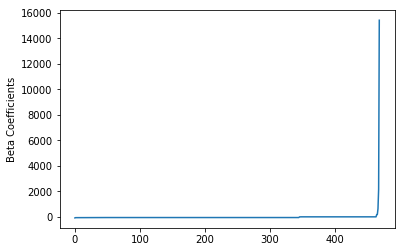

In [27]:
# Obtain the coefficients by using LogisticRegressionModel's attributes

import matplotlib.pyplot as plt
import numpy as np

# Visualising the coefficients. Sort from lowest to highest.
beta = np.sort(lr_model.coefficients)

# Plot the data.
plt.plot(beta)

# Add a label to the data.
plt.ylabel('Beta Coefficients')

# Show the graph. 
plt.show()

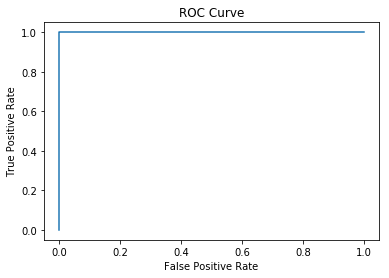

Area Under the Curve: 1.0


In [28]:
# Obtain the receiver-operating characteristic and areaUnderROC

# Let's get a summary of the data.
training_summary = lr_model.summary

# Convert the DataFrame to a Pandas DataFrame.
ROC = training_summary.roc.toPandas()

# Plot the true positive and false positive rates.
plt.plot(ROC['FPR'],ROC['TPR'])

# Define the labels.
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

# Print the AUC statistic. 
print('Area Under the Curve: ' + str(training_summary.areaUnderROC))

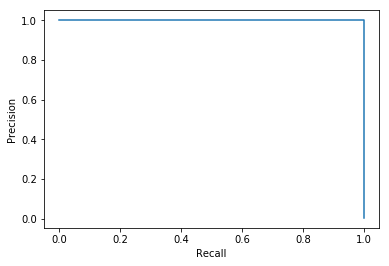

In [29]:
# Precision and Recall

# Convert DataFrame to Pandas DataFrame.
pr = training_summary.pr.toPandas()

# Plot model recall and precision.
plt.plot(pr['recall'],pr['precision'])

# Define the labels and show the graph. 
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

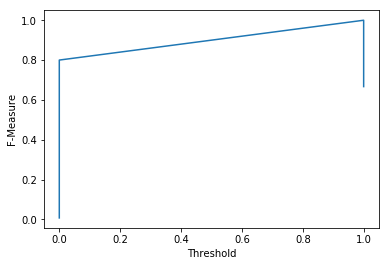

In [31]:
# Set the model threshold to maximize F-Measure

f = training_summary.fMeasureByThreshold.toPandas()
plt.plot(f['threshold'],f['F-Measure'])
plt.ylabel('F-Measure')
plt.xlabel('Threshold')
plt.show()

In [ ]:
df.write.csv('dataset.csv')